# Proof of Concept (POC)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [36]:
def h00(t):
    return 2 * t**3 - 3 * t**2 + 1


def h10(t):
    return t**3 - 2 * t**2 + t


def h01(t):
    return -2 * t**3 + 3 * t**2


def h11(t):
    return t**3 - t**2


def pchint(x, y, x0):
    n = len(x)
    d = np.zeros(n - 1)
    for i in range(n - 1):
        d[i] = (y[i + 1] - y[i]) / (x[i + 1] - x[i])

    m = np.zeros(n)
    m[0] = d[0]
    m[-1] = d[-1]

    for i in range(1, n - 1):
        if d[i - 1] * d[i] < 0:
            m[i] = 0
        else:
            m[i] = (d[i - 1] + d[i]) / 2

    for i in range(n - 1):
        if y[i] == y[i + 1]:
            m[i] = 0
            m[i + 1] = 0

    for i in range(n - 1):
        if m[i] != 0:
            alfa = m[i] / d[i]
            beta = m[i + 1] / d[i]

            condicion = alfa - ((2 * alfa + beta - 3) ** 2) / (alfa + beta - 2) / 3

            while condicion < 0:
                tau = 3 / math.sqrt(alfa**2 + beta**2)
                alfa = tau * alfa
                beta = tau * beta
                m[i] = alfa * d[i]
                m[i + 1] = beta * d[i]
                condicion = alfa - ((2 * alfa + beta - 3) ** 2) / (alfa + beta - 2) / 3
    pos = 0
    c = 0
    F = np.zeros(len(x0))

    for xi in x0:
        if xi > x[pos + 1]:
            pos += 1

        delta = x[pos + 1] - x[pos]
        t = (xi - x[pos]) / delta
        F[c] = (
            y[pos] * h00(t)
            + delta * m[pos] * h10(t)
            + y[pos + 1] * h01(t)
            + delta * m[pos + 1] * h11(t)
        )
        c += 1
    return F

In [44]:
x = [1,2,3,4,5]
y = [1, 4,5,2,8]

x0 = np.linspace(1,5,20)
print(len(x0))
y0 = pchint(x, y, x0)

print(len(y0))

20
20


/tmp/ipykernel_96131/2549667110.py:43: RuntimeWarning: divide by zero encountered in scalar divide
  condicion = alfa - ((2 * alfa + beta - 3) ** 2) / (alfa + beta - 2) / 3


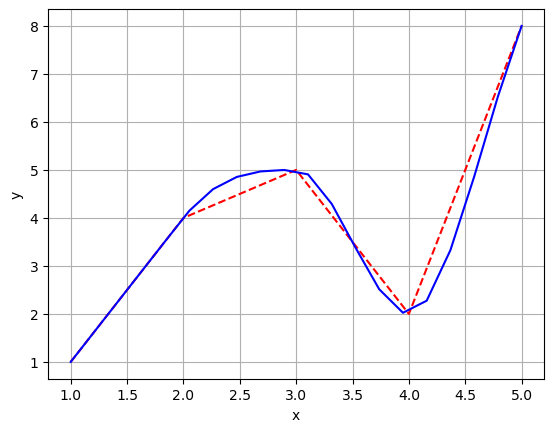

In [46]:
plt.plot(x, y, 'r--')
plt.plot(x0, y0, 'b')
plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)